In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_excel('train.xlsx')
train_df.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
5,6,"IMPORTANT: In response to COVID-19, this prope...","Hi, we are Homing - a company that develops it...",0


In [3]:
train_reviews_df = pd.read_excel('train_reviews.xlsx')
train_reviews_df.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        12496 non-null  int64 
 1   description  12496 non-null  object
 2   host_about   12496 non-null  object
 3   unlisted     12496 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [ ]:
train_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     721402 non-null  int64 
 1   comments  721402 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


In [6]:
print('There are {} Airbnbs in the data.'.format(train_df['index'].nunique()))

There are 12496 Airbnbs in the data.


In [7]:
n = len(list(set(train_df['index'].unique()).difference(train_reviews_df['index'].unique())))
print('Number of Airbnbs without reviews: {}'.format(n))

Number of Airbnbs without reviews: 4029


In [12]:
train_reviews_df['comments'] = train_reviews_df['comments'].astype(str)
concatenated_info = train_reviews_df['comments'].str.cat(sep=' ')

### THE CELL BELOW TOOKS 3min TO RUN

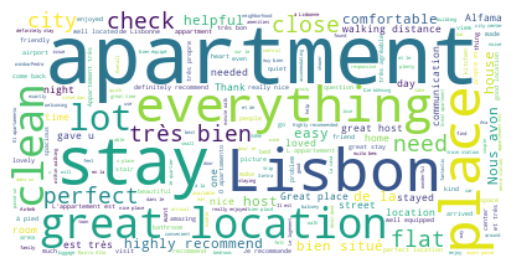

In [14]:
# Create stopword list:
text =  concatenated_info
stopwords = set(STOPWORDS)
stopwords.update(["_x000D_", 'br'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    ReviewText = ReviewText.str.replace('(_x000D_)', ' ')  
    return ReviewText
train_reviews_df['comments'] = preprocess(train_reviews_df['comments'])

train_reviews_df['polarity'] = train_reviews_df['comments'].map(lambda text: TextBlob(text).sentiment.polarity)

C:\Users\henri\AppData\Local\Temp\ipykernel_4996\377772254.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace("(<br/>)", "")
C:\Users\henri\AppData\Local\Temp\ipykernel_4996\377772254.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\henri\AppData\Local\Temp\ipykernel_4996\377772254.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&amp)', '')
C:\Users\henri\AppData\Local\Temp\ipykernel_4996\377772254.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&gt)', '')
C:\Users\henri\AppData\Local\Temp\ipykernel_4996\377772254.py:7: FutureWarning: The default value of regex will change from True to False in a fu

In [28]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = train_reviews_df.loc[train_reviews_df.polarity == 1, ['comments']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

We had a really great time at Rita's apparment. As every year - a five star experience!
Très bon emplacement, chambre cosy, accueil chaleureux. L'immeuble est ancien donc l'isolation phonique n'est pas bonne, mais vraiment pour le reste tout est parfait, excellent rapport qualité-prix.
Excellent séjour, appartement avec une sublime vue
Perfect
Des pâtisseries,de l eau fraiche dans le frigo ces petites attentions nous ont fait plaisir en arrivant .Le logement est conforme au descriptif ainsi  que très propre .  Le quartier est populaire ,chaleureux . Nous avons fait  la connaissance de Manuel José ,très sympathique et serviable. Nous avons passé un excellent séjour à Lisbonne .


In [19]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = train_reviews_df.loc[train_reviews_df.polarity == 0, ['comments']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Arlindo et Silvia sont très accueillants et disponible à tout moment pour vous aider à passer un agréable séjour.
Appartamento in una buona posizione. Non rende come da foto . Pulizia molto superficiale, dalla cucina provengono cattivi odori . Abbiamo trovato piatti , tazze e asciugamani sporchi… Non ne vale la pena per i soldi spesi , peccato..
Tout c'est très bien passé, le logement est parfait et fidèle à la description . Nous n'hésiterons pas à le louer de nouveau pour une prochaine escale à Lisbonne.
Gutes Apartment, haben uns wohl gefühlt. Auch sehr sauber.
Appart très bien placé avec un mignon petit chat pour nous accueillir ... Merci !


In [26]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = train_reviews_df.loc[train_reviews_df.polarity == -0.5, ['comments']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Vi kan kun anbefale dette sted. Alle vores forventninger blev mere end indfriet fra første dag. Rødvin som velkomstdrink og hurtig og smidig kommunikation var store plusser, og samtidig var lejligheden skinnende ren og med en fantastisk beliggenhed i hjertet af Alfama. Vi nød terrassen meget og Lissabon i særdeleshed. Kan kun anbefales.
Bon airbnb au global mais difficile d’accès. Inaccessible en voiture. Tout en pente horrible avec de grosses valises et plusieurs sacs comme les nôtres.
Vi kan ikke anbefale en fortsat udlejning af lejligheden trods fin location og gode P-muligheder. Der er brug for en mere omfattende renovering, før lejligheden fremtræder indbydende og behagelig at opholde sig i. Kaj
Nous avons apprécié ce logement au calme, très bien équipé, dans un quartier véritablement portugais, loin de la grande vague touristique. Un accueil très convivial dans tous les commerces de proximité et très bien desservi p

#Text Analytics: You can perform text mining and analysis on the textual data, such as the descriptions of the Airbnb properties and host information. For example, you can perform sentiment analysis, topic modeling, and entity recognition to gain insights into the sentiment of guests and popular themes among hosts.